In [1]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score
import tensorflow as tf
from tensorflow import keras
from keras.layers import LSTM,Dropout, BatchNormalization, Dense
from keras.models import Sequential
import talib

In [2]:
data = yf.download('0005.hk',"2020-09-28","2021-09-24")

[*********************100%***********************]  1 of 1 completed


In [3]:
data.shape

(244, 6)

In [4]:
data.isnull().sum()

Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [5]:
data=data.sort_values("Date")
data=data[["Open","High","Low","Close"]]
data.head()

,Open,High,Low,Close
Date,,,,
2020-09-28,28.350000,31.299999,28.250000,30.799999
2020-09-29,30.850000,31.400000,30.000000,30.000000
2020-09-30,30.500000,30.500000,29.650000,29.799999
2020-10-05,30.700001,31.900000,30.700001,31.000000
2020-10-06,31.100000,31.200001,30.750000,31.049999


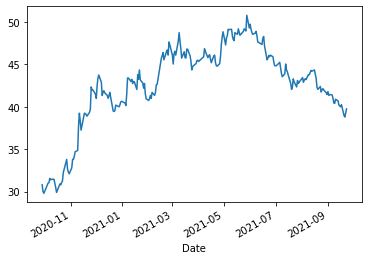

In [6]:
# Plot the close prices
data["Close"].plot()
plt.show()

In [7]:
# data=pd.merge(data,data["Close"].pct_change(),left_index=True,right_index=True)
data["% Change"]=data["Close"].pct_change()

In [8]:
data.dropna(inplace=True)
data

,Open,High,Low,Close,% Change
Date,,,,,
2020-09-29,30.850000,31.400000,30.000000,30.000000,-0.025974
2020-09-30,30.500000,30.500000,29.650000,29.799999,-0.006667
2020-10-05,30.700001,31.900000,30.700001,31.000000,0.040268
2020-10-06,31.100000,31.200001,30.750000,31.049999,0.001613
2020-10-07,31.049999,31.600000,31.000000,31.549999,0.016103
...,...,...,...,...,...
2021-09-16,40.599998,40.599998,39.599998,40.000000,-0.002494
2021-09-17,39.700001,40.400002,39.099998,40.250000,0.006250
2021-09-20,39.900002,39.950001,38.950001,39.000000,-0.031056


In [9]:
data.isnull().sum()

Open        0
High        0
Low         0
Close       0
% Change    0
dtype: int64

In [10]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
# data_scaled = sc.fit_transform(data)
# data_scaled = data_scaled
train = data[0:int(len(data)*0.99)]
data_price=train["Close"]
train = train.values
# scl = MinMaxScaler()
# #Scale the data
# scl.fit(train.values.reshape(-1,1))
# cl =scl.transform(cl.values.reshape(-1,1))
sc = MinMaxScaler(feature_range=(0,1))
train=sc.fit_transform(train)
def processData(data,data_price,lb):
    X,Y = [],[]
    for i in range(len(data)-lb-1):
        X.append(data[i:(i+lb)])
        Y.append(data_price[(i+lb)])
    return np.array(X),np.array(Y)

lb=5
X,y = processData(train,data_price,lb)
X_train,X_test = X[:int(X.shape[0]*0.90)],X[int(X.shape[0]*0.90):]
y_train,y_test = y[:int(y.shape[0]*0.90)].reshape(-1,1),y[int(y.shape[0]*0.90):].reshape(-1,1)
print(X.shape)
print(X_train.shape[0],X_train.shape[1])
print(X_test.shape[0], X_test.shape[1])
print(y_train.shape[0])
print(y_test.shape[0])

(234, 5, 5)
210 5
24 5
210
24


In [11]:
# X=np.array(data_scaled)
# Y=np.array(data["Close"])

In [12]:
# X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.1)

In [13]:
# data formt (num_data, x_step_before,num_featuers)
X_train = X_train.reshape((X_train.shape[0], X_test.shape[2], X_train.shape[1]))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[2], X_test.shape[1]))
print(X_train.shape,y_train.shape,X_test.shape,y_test.shape)

(210, 5, 5) (210, 1) (24, 5, 5) (24, 1)


In [14]:
X_train[0]

array([[0.04962779, 0.053528  , 0.01776652, 0.00952385, 0.11588169],
       [0.03225805, 0.0097324 , 0.        , 0.        , 0.27429887],
       [0.04218364, 0.0778589 , 0.05329955, 0.05714289, 0.65940369],
       [0.06203474, 0.0437957 , 0.05583759, 0.05952381, 0.34223305],
       [0.05955329, 0.0632604 , 0.06852794, 0.08333333, 0.46112552]])

# Construct Long-Short-Term Memory Model with Nerual Network

In [15]:
model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape= (X_train.shape[1], X_train.shape[2])))
model.add(LSTM(64, return_sequences=False))
model.add(Dense(32))
model.add(Dense(1))
model.compile(
  loss='mean_squared_error',
  optimizer=keras.optimizers.Adam(0.001)
)

ValueError: Could not interpret optimizer identifier: <tensorflow.python.keras.optimizer_v2.adam.Adam object at 0x7fe18c338430>

In [ ]:
history = model.fit(
    X_train, y_train,
    epochs=100,
    batch_size=16,
    validation_split=0.1,
    verbose=1,
    shuffle=False
)

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()

In [ ]:
plt.plot(np.arange(0, len(y_train)), y_train, 'g', label="history")
plt.plot(np.arange(len(y_train), len(y_train) + len(y_test)), y_test, marker='.', label="true")
plt.plot(np.arange(len(y_train), len(y_train) + len(y_test)), y_pred, 'r', label="prediction")
plt.ylabel('Value')
plt.xlabel('Time Step')
plt.legend()
plt.show();

In [ ]:
plt.plot(y_test, marker='.', label="true")
plt.plot(y_pred, 'r', label="prediction")
plt.ylabel('Value')
plt.xlabel('Time Step')
plt.legend()
plt.show();

In [ ]:
# y_test = sc.inverse_transform(y_test)
# y_pred = sc.inverse_transform(y_pred)
plt.plot(y_test, marker='.', label="true")
plt.plot(y_pred, 'r', label="prediction")
plt.ylabel('Value')
plt.xlabel('Time Step')
plt.legend()
plt.show();

# TESTING on TECH stock

In [ ]:
data=yf.download('0700.hk')

In [ ]:
data=data[["Open","High","Low","Close"]]
data=data[:-5]
data_val=data[-5:]
data_val.tail()

In [ ]:
sc = MinMaxScaler(feature_range = (0, 1))

In [ ]:
X=np.array(data.drop("Close",1))
Y = sc.fit_transform(data["Close"].values.reshape(-1,1))
# Y=np.array(data["Close"])
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.1)
X_train = X_train.reshape((X_train.shape[0], 1, X_train.shape[1]))
X_test = X_test.reshape((X_test.shape[0], 1, X_test.shape[1]))
print(X_train.shape,y_train.shape,X_test.shape,y_test.shape)

In [ ]:
model_tech = keras.Sequential()
model_tech.add(keras.layers.LSTM(
  units=128,
  input_shape=(X_train.shape[1], X_train.shape[2])
))
model_tech.add(keras.layers.Dense(units=1))
model_tech.compile(
  loss='mean_squared_error',
  optimizer=keras.optimizers.Adam(0.001)
)

In [ ]:
history_tech=model_tech.fit(
    X_train, y_train,
    epochs=100,
    batch_size=16,
    validation_split=0.1,
    verbose=1,
    shuffle=False
)
y_pred = model_tech.predict(X_test)

In [ ]:
plt.plot(history_tech.history['loss'], label='train')
plt.plot(history_tech.history['val_loss'], label='test')
plt.legend()

In [ ]:
plt.plot(np.arange(0, len(y_train)), y_train, 'g', label="history")
plt.plot(np.arange(len(y_train), len(y_train) + len(y_test)), y_test, marker='.', label="true")
plt.plot(np.arange(len(y_train), len(y_train) + len(y_test)), y_pred, 'r', label="prediction")
plt.ylabel('Value')
plt.xlabel('Time Step')
plt.legend()
plt.show();

In [ ]:
y_test = sc.inverse_transform(y_test)
y_pred = sc.inverse_transform(y_pred)
plt.plot(y_test, marker='.', label="true")
plt.plot(y_pred, 'r', label="prediction")
plt.ylabel('Value')
plt.xlabel('Time Step')
plt.legend()
plt.show();

# Prediction on UNSEEN DATA 

In [ ]:
# val=np.array(data_val["Close"])
val = data_val["Close"].values.reshape(-1,1)
data_val=np.array(data_val.drop("Close",1))
data_val = data_val.reshape((data_val.shape[0], 1, data_val.shape[1]))

In [ ]:
val_pred=model_tech.predict(data_val)
val.shape

In [ ]:
plt.plot(val, marker='.', label="true")
plt.plot(val_pred, 'r', marker='.',label="prediction")
plt.ylabel('Value')
plt.xlabel('Time Step')
plt.legend()
plt.show();